In [1]:
!pip install mediapipe

     |████████████████████████████████| 32.2 MB 19 kB/s 


In [2]:
from google.colab import files

uploaded = files.upload()

Saving dedos-mano.jpg to dedos-mano.jpg


dedos-mano.jpg


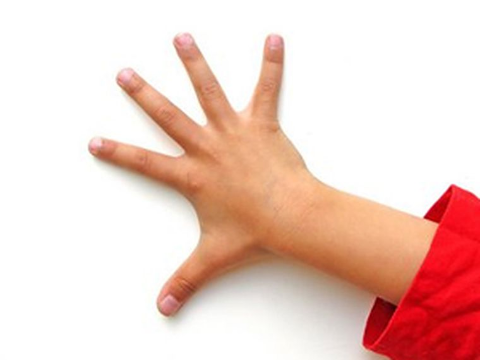

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import math
import numpy as np

DESIRED_HEIGHT = 480
DESIRED_WIDTH = 480
def resize_and_show(image):
  h, w = image.shape[:2]
  if h < w:
    img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
  else:
    img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
  cv2_imshow(img)

# Read images with OpenCV.
images = {name: cv2.imread(name) for name in uploaded.keys()}
# Preview the images.
for name, image in images.items():
  print(name)   
  resize_and_show(image)

In [4]:
import mediapipe as mp
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
drawing_styles = mp.solutions.drawing_styles
help(mp_hands.Hands)

Help on class Hands in module mediapipe.python.solutions.hands:

class Hands(mediapipe.python.solution_base.SolutionBase)
 |  Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe Hands.
 |  
 |  MediaPipe Hands processes an RGB image and returns the hand landmarks and
 |  handedness (left v.s. right hand) of each detected hand.
 |  
 |  Note that it determines handedness assuming the input image is mirrored,
 |  i.e., taken with a front-facing/selfie camera (
 |  https://en.wikipedia.org/wiki/Front-facing_camera) with images flipped
 |  horizontally. If that is not the case, use, for instance, cv2.flip(image, 1)
 |  to flip the image first for a correct handedness output.
 |  
 |  Please refer to https://solutions.mediapipe.dev/hands#python-solution-api for
 |  usage examples.
 |  
 |  Method resolution order:
 |      Hands
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Method

Handedness of dedos-mano.jpg:
[classification {
  index: 0
  score: 0.5738874077796936
  label: "Left"
}
]
Hand landmarks of dedos-mano.jpg:
Index finger tip coordinate: ( 602.8422951698303, 232.0136833190918)


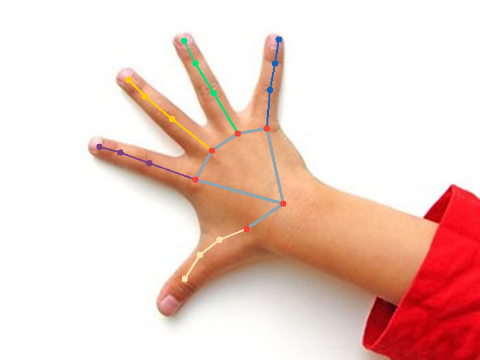

In [7]:
# Run MediaPipe Hands.
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for name, image in images.items():
    # Convert the BGR image to RGB, flip the image around y-axis for correct 
    # handedness output and process it with MediaPipe Hands.
    results = hands.process(cv2.flip(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 1))

    # Print handedness (left v.s. right hand).
    print(f'Handedness of {name}:')
    print(results.multi_handedness)

    if not results.multi_hand_landmarks:
      continue
    # Draw hand landmarks of each hand.
    print(f'Hand landmarks of {name}:')
    image_hight, image_width, _ = image.shape
    annotated_image = cv2.flip(image.copy(), 1)
    for hand_landmarks in results.multi_hand_landmarks:
      # Print index finger tip coordinates.
      print(
          f'Index finger tip coordinate: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_hight})'
      )
      mp_drawing.draw_landmarks(
          annotated_image, hand_landmarks, mp_hands.HAND_CONNECTIONS,
          drawing_styles.get_default_hand_landmark_style(),
          drawing_styles.get_default_hand_connection_style())
    resize_and_show(cv2.flip(annotated_image, 1))

In [8]:
print (results.multi_hand_landmarks)


[landmark {
  x: 0.41017472743988037
  y: 0.5659388303756714
  z: -5.1754079322563484e-05
}
landmark {
  x: 0.48679184913635254
  y: 0.6358873844146729
  z: -0.010724390856921673
}
landmark {
  x: 0.5433374643325806
  y: 0.6665015816688538
  z: -0.045479968190193176
}
landmark {
  x: 0.5840949416160583
  y: 0.7084514498710632
  z: -0.07289968430995941
}
landmark {
  x: 0.6146942973136902
  y: 0.7744569182395935
  z: -0.11027106642723083
}
landmark {
  x: 0.5926377177238464
  y: 0.4996979832649231
  z: -0.10185392200946808
}
landmark {
  x: 0.6890169382095337
  y: 0.4533011317253113
  z: -0.13810928165912628
}
landmark {
  x: 0.7496780157089233
  y: 0.42434388399124146
  z: -0.1647614985704422
}
landmark {
  x: 0.7932135462760925
  y: 0.4070415496826172
  z: -0.1889493465423584
}
landmark {
  x: 0.558410108089447
  y: 0.4182136654853821
  z: -0.1000826507806778
}
landmark {
  x: 0.6408051252365112
  y: 0.331010639667511
  z: -0.1424996703863144
}
landmark {
  x: 0.6976657509803772
  y: 

In [32]:
puntos = np.array([results.multi_hand_landmarks])
print(puntos)

[[landmark {
  x: 0.41017472743988037
  y: 0.5659388303756714
  z: -5.1754079322563484e-05
}
landmark {
  x: 0.48679184913635254
  y: 0.6358873844146729
  z: -0.010724390856921673
}
landmark {
  x: 0.5433374643325806
  y: 0.6665015816688538
  z: -0.045479968190193176
}
landmark {
  x: 0.5840949416160583
  y: 0.7084514498710632
  z: -0.07289968430995941
}
landmark {
  x: 0.6146942973136902
  y: 0.7744569182395935
  z: -0.11027106642723083
}
landmark {
  x: 0.5926377177238464
  y: 0.4996979832649231
  z: -0.10185392200946808
}
landmark {
  x: 0.6890169382095337
  y: 0.4533011317253113
  z: -0.13810928165912628
}
landmark {
  x: 0.7496780157089233
  y: 0.42434388399124146
  z: -0.1647614985704422
}
landmark {
  x: 0.7932135462760925
  y: 0.4070415496826172
  z: -0.1889493465423584
}
landmark {
  x: 0.558410108089447
  y: 0.4182136654853821
  z: -0.1000826507806778
}
landmark {
  x: 0.6408051252365112
  y: 0.331010639667511
  z: -0.1424996703863144
}
landmark {
  x: 0.6976657509803772
  y:

In [35]:
listOfKeys = results.multi_hand_landmarks.keys()
print("el tipo de variable es: ", type(listOfKeys)) 

AttributeError: ignored

In [30]:
np.save("manos.npy", puntos)

In [33]:
np.load("manos.npy")

ValueError: ignored